In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#from google.colab import drive
#drive.mount('/content/drive')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter=';')
#data.head()

In [61]:
data = pd.read_csv('cardio_train.csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [63]:
data['age'] = round(data['age'] // 365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [64]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Analysing objective features

Text(0.5, 1.0, "Boxplot pour l'âge")

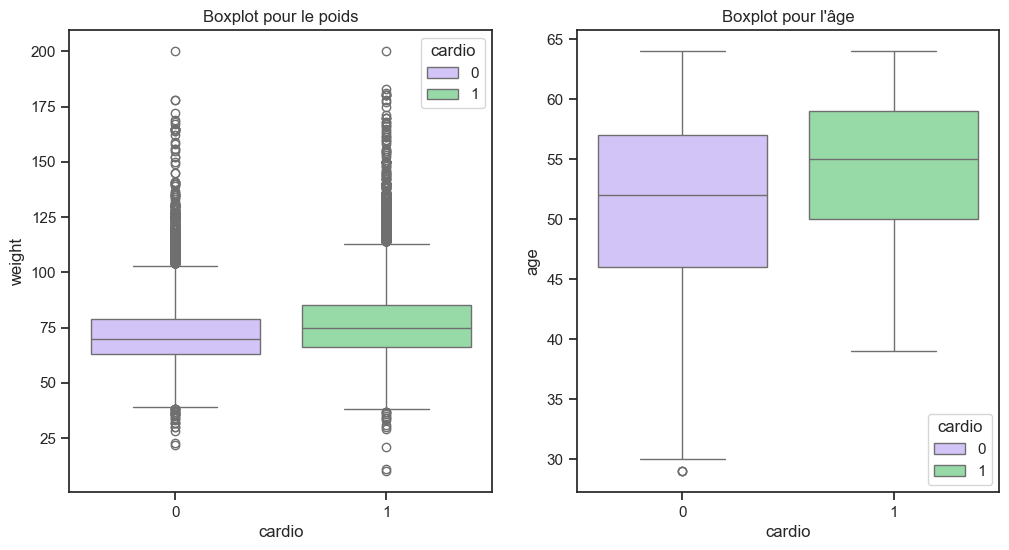

In [65]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x="cardio", y="weight",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[0])

sns.boxplot(x="cardio", y="age",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[1])

axes[0].set_title('Boxplot pour le poids')
axes[1].set_title('Boxplot pour l\'âge')

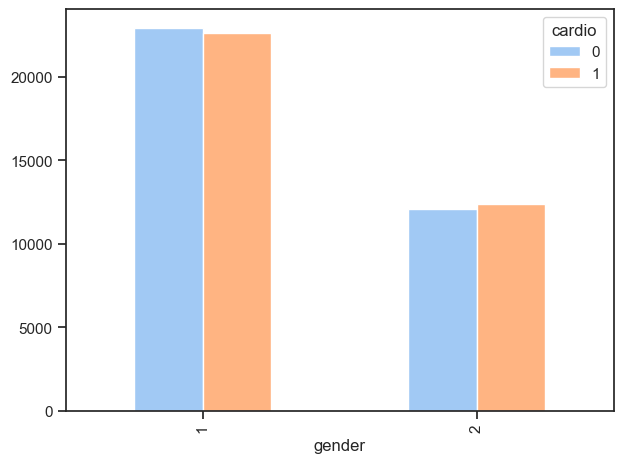

In [66]:
gender_crosstab = pd.crosstab(index=data['gender'], columns=data['cardio'], margins=True)
gender_crosstab.drop(['All'], axis=1, inplace=True)
gender_crosstab.drop(['All'], axis=0, inplace=True)

#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
gender_crosstab.plot(kind='bar')
plt.tight_layout()
plt.show()

### Conclusion
Dans ce jeu de données :
- Les __femmes__ qui souffrent d'une maladie cardio-vasculaire sont __*moins*__ des femmes qui sont saines
- Les __hommes__ qui souffrent d'une maladie cardio-vasculaire sont __*plus*__ des femmes qui sont sains

<Axes: xlabel='age'>

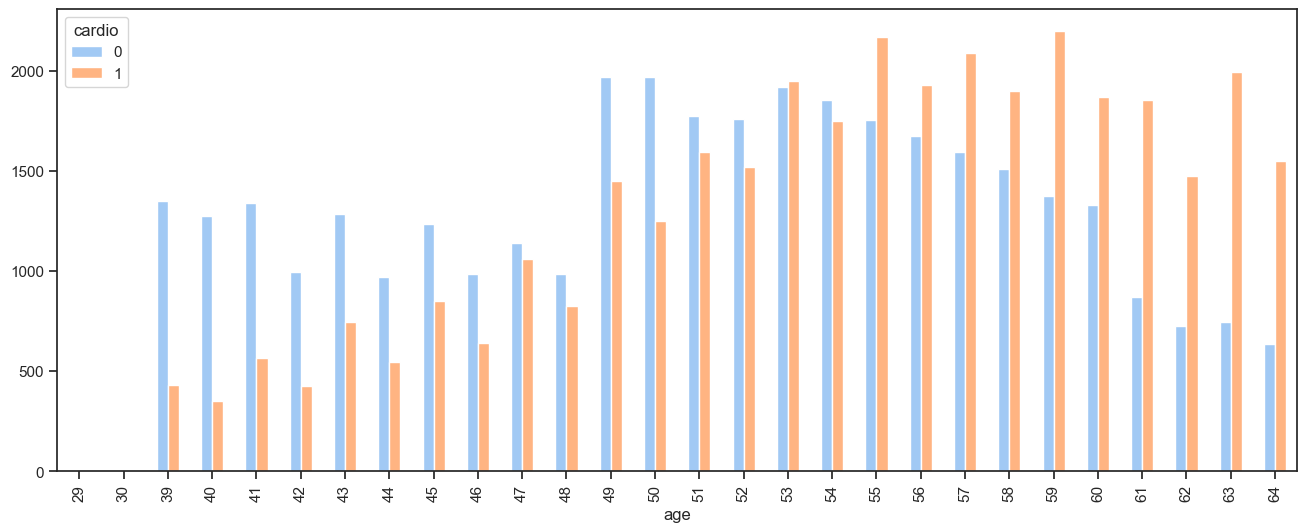

In [67]:
age_crosstab = pd.crosstab(index=data['age'], columns=data['cardio'], margins=True)
age_crosstab.drop(['All'], axis=1, inplace=True)
age_crosstab.drop(['All'], axis=0, inplace=True)

fig, axes = plt.subplots(figsize=(16, 6))
age_crosstab.plot(kind='bar', ax=axes)

On remarque qu'à partir de 55 ans, le nombre des gens atteints par une maladie cardio-vasculaire depasse le nobre des gens sains

<Figure size 1000x600 with 0 Axes>

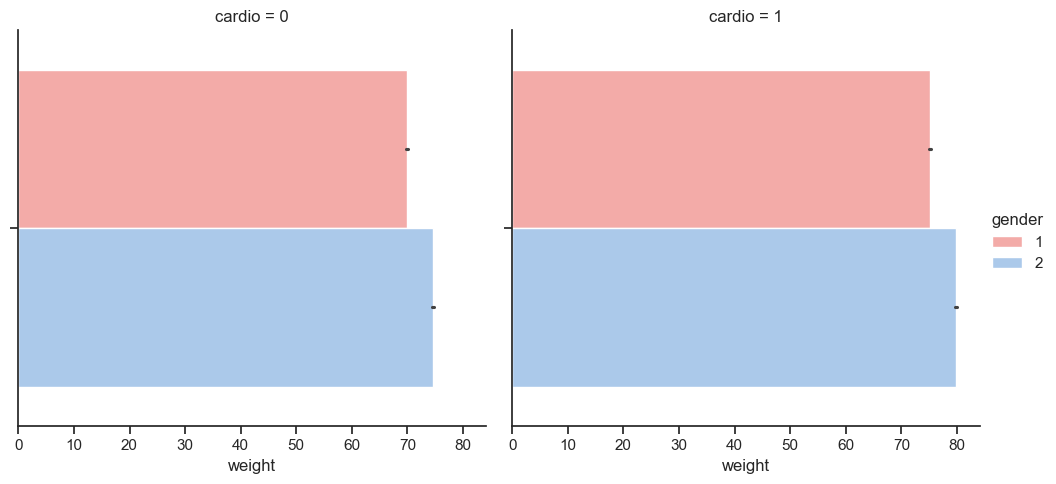

In [68]:
plt.figure(figsize=(10, 6))

sns.catplot(x="weight", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()


On observe que, en moyenne, les patients avec une maladie cardio-vasculaire sont plus lourds que les patients sans maladie cardio-vasculaire.

### Indice de masse corporelle

In [69]:
data['IMC'] = data['weight']/((data['height']/100)**2)

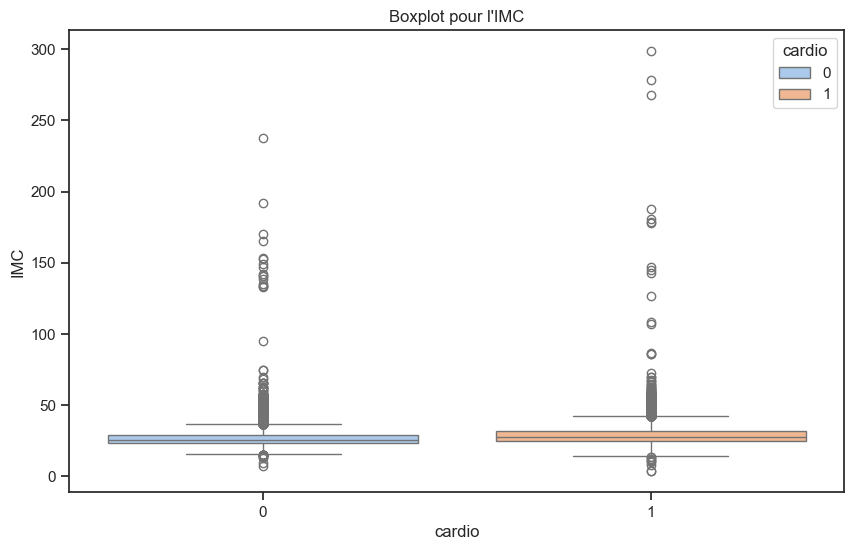

In [70]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='cardio', y='IMC', data=data, hue='cardio', palette='pastel')

plt.title('Boxplot pour l\'IMC')
plt.show()


On remarque des valeurs abérrantes comme 250 et 300 poue l'ICM, ce qui est impossible. c'est mieux de les enlever

In [71]:
cleaned_data = data[(10 < data['IMC']) & (data['IMC'] < 65)]

In [72]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69946 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69946 non-null  int64  
 1   age          69946 non-null  int64  
 2   gender       69946 non-null  int64  
 3   height       69946 non-null  int64  
 4   weight       69946 non-null  float64
 5   ap_hi        69946 non-null  int64  
 6   ap_lo        69946 non-null  int64  
 7   cholesterol  69946 non-null  int64  
 8   gluc         69946 non-null  int64  
 9   smoke        69946 non-null  int64  
 10  alco         69946 non-null  int64  
 11  active       69946 non-null  int64  
 12  cardio       69946 non-null  int64  
 13  IMC          69946 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 8.0 MB


<Figure size 1000x600 with 0 Axes>

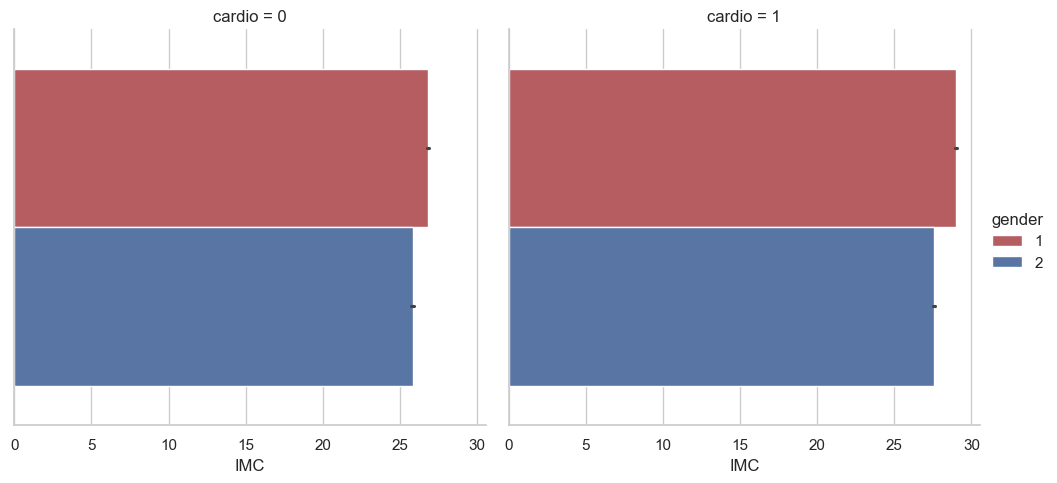

In [73]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.catplot(x="IMC", hue="gender", col="cardio", data=cleaned_data, kind='bar', palette=["r", "b"])

plt.show()

On remarque que les personnes qui ont une maladie cardio-vasculaire sont en surpoids.

# Analysing examination features

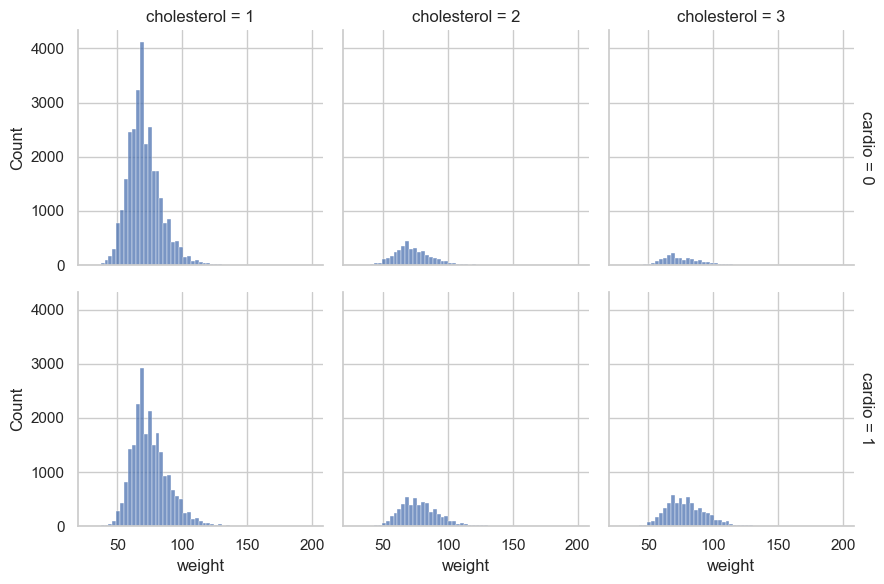

In [74]:
sns.displot(
    cleaned_data, x="weight", col="cholesterol", row="cardio",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## Distribution des pressions artérielles (ap_hi et ap_lo)

Text(0.5, 1.0, 'Boxplot pour ap_lo')

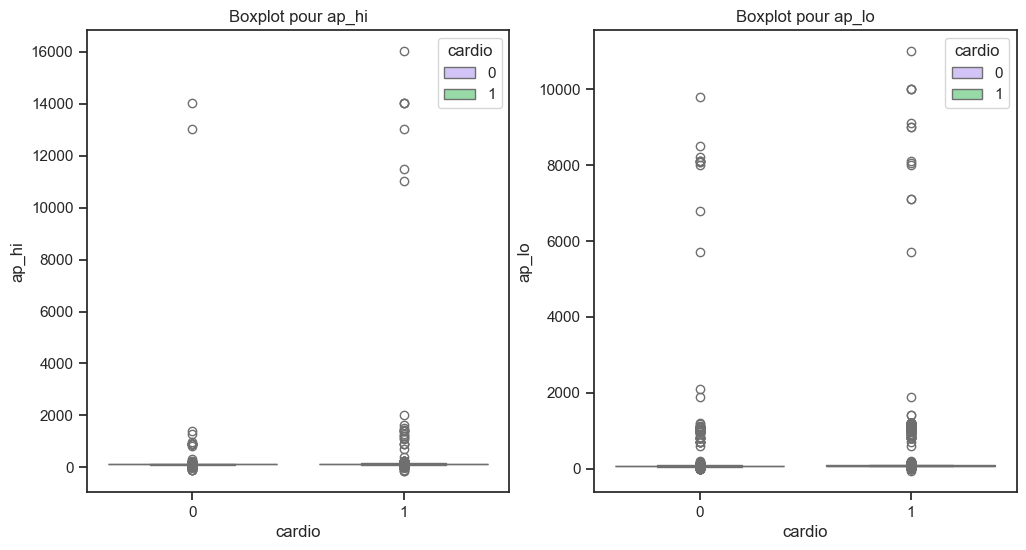

In [75]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x="cardio", y="ap_hi",
            hue="cardio", palette=["m", "g"],
            data=cleaned_data, ax=axes[0])

sns.boxplot(x="cardio", y="ap_lo",
            hue="cardio", palette=["m", "g"],
            data=cleaned_data, ax=axes[1])

axes[0].set_title('Boxplot pour ap_hi')
axes[1].set_title('Boxplot pour ap_lo')

Des valeurs extrêmement élevées pour la pression artérielle systolique (ap_hi) ou la pression artérielle diastolique (ap_lo), telles que celles dépassant 10000, sont généralement considérées comme irréalistes et peuvent résulter d'erreurs de mesure ou de saisie de données. En pratique médicale, de telles valeurs sont inhabituelles et ne correspondent pas aux plages normales de la pression artérielle.

In [76]:
#cleaned_data = cleaned_data[(10 < data['ap_hi']) & (data['ap_hi'] < 250) & (10 < data['ap_lo']) & (data['ap_lo'] < 200)]
cleaned_data = cleaned_data.loc[(10 < data['ap_hi']) & (data['ap_hi'] < 250) & (10 < data['ap_lo']) & (data['ap_lo'] < 200)]

In [77]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68912 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68912 non-null  int64  
 1   age          68912 non-null  int64  
 2   gender       68912 non-null  int64  
 3   height       68912 non-null  int64  
 4   weight       68912 non-null  float64
 5   ap_hi        68912 non-null  int64  
 6   ap_lo        68912 non-null  int64  
 7   cholesterol  68912 non-null  int64  
 8   gluc         68912 non-null  int64  
 9   smoke        68912 non-null  int64  
 10  alco         68912 non-null  int64  
 11  active       68912 non-null  int64  
 12  cardio       68912 non-null  int64  
 13  IMC          68912 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


## Relation entre la pression systolique et diastolique

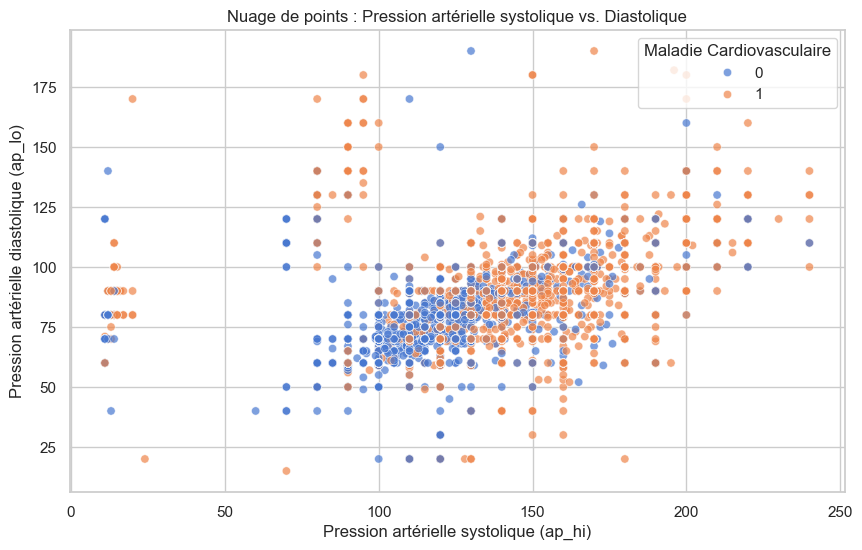

In [78]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=cleaned_data, palette="muted", alpha=0.7)
plt.title('Nuage de points : Pression artérielle systolique vs. Diastolique')
plt.xlabel('Pression artérielle systolique (ap_hi)')
plt.ylabel('Pression artérielle diastolique (ap_lo)')
plt.legend(title='Maladie Cardiovasculaire', loc='upper right')
plt.show()

## Répartition du cholestérol et de la glycémie

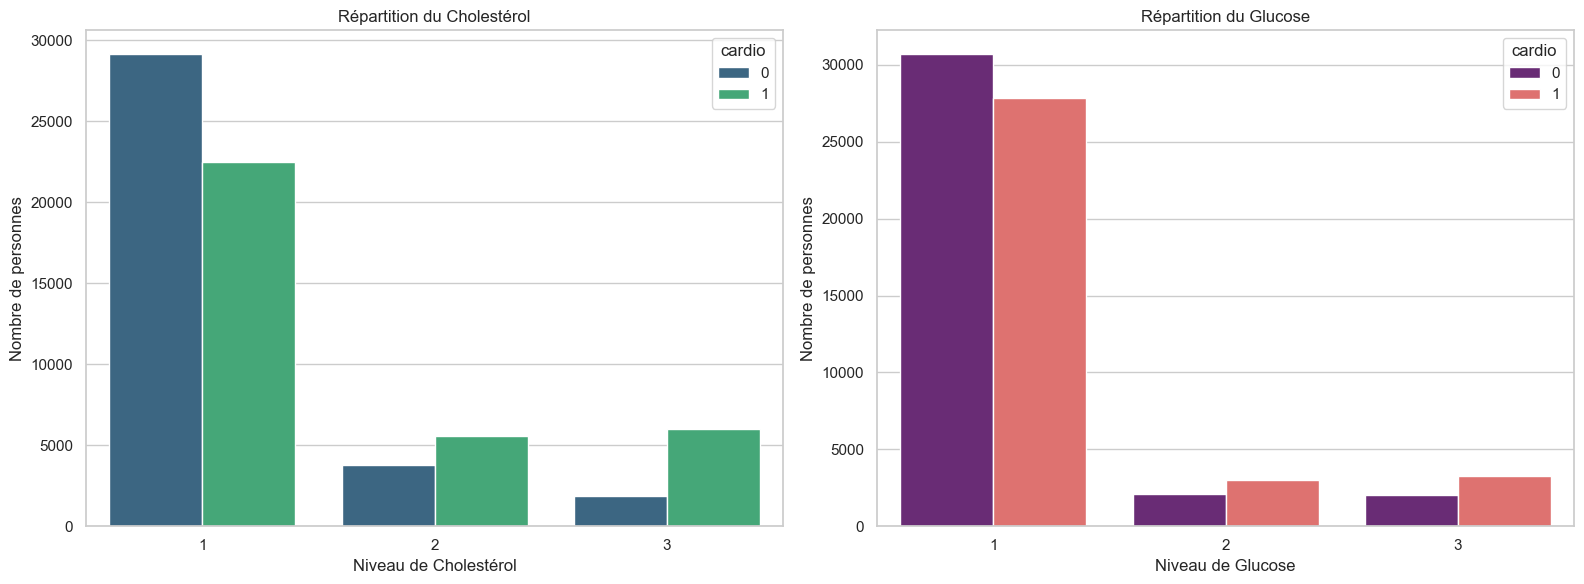

In [79]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme à barres pour le cholestérol
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', hue='cardio', data=cleaned_data, palette='viridis')
plt.title('Répartition du Cholestérol')
plt.xlabel('Niveau de Cholestérol')
plt.ylabel('Nombre de personnes')

# Diagramme à barres pour le glucose
plt.subplot(1, 2, 2)
sns.countplot(x='gluc', hue='cardio', data=cleaned_data, palette='magma')
plt.title('Répartition du Glucose')
plt.xlabel('Niveau de Glucose')
plt.ylabel('Nombre de personnes')

# Ajuste le layout
plt.tight_layout()

# Affiche la figure
plt.show()

On remarque que la plus part des personnes souffrant d'une maladie cardio-vasculaire ont un niveau normal de cholestérol et du glucose

## Visualisation avec des diagrammes en violon

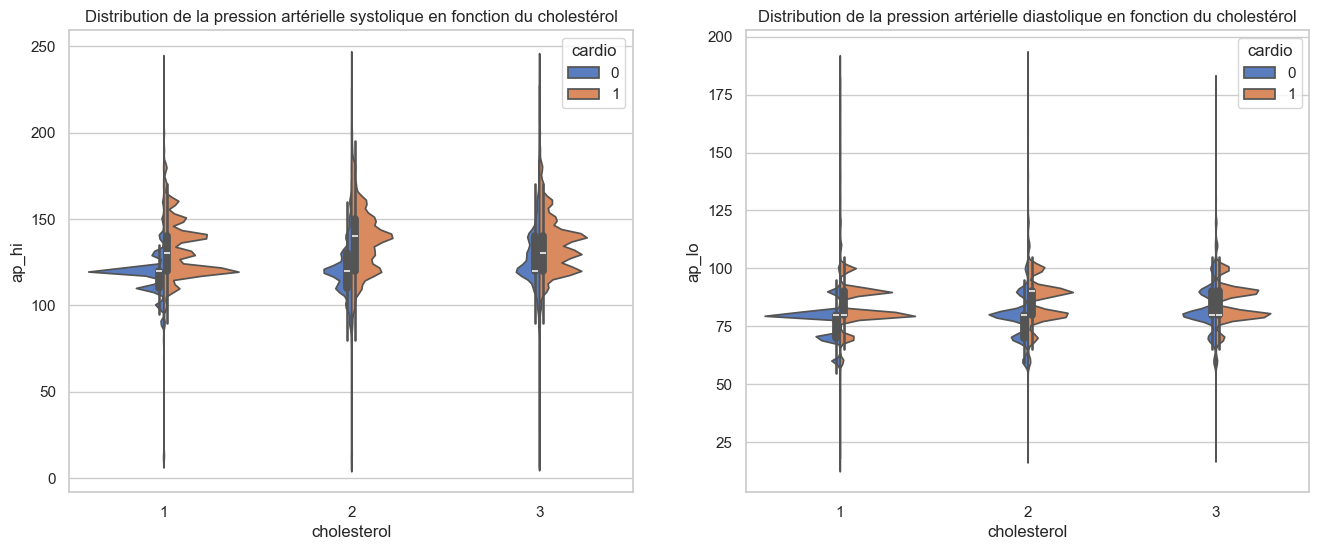

In [80]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme en violon pour la pression artérielle systolique en fonction du cholestérol
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="cholesterol", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du cholestérol')

sns.violinplot(x="cholesterol", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du cholestérol')
plt.show()


# Analysing Subjective Features

## Tabac et tension arterielle

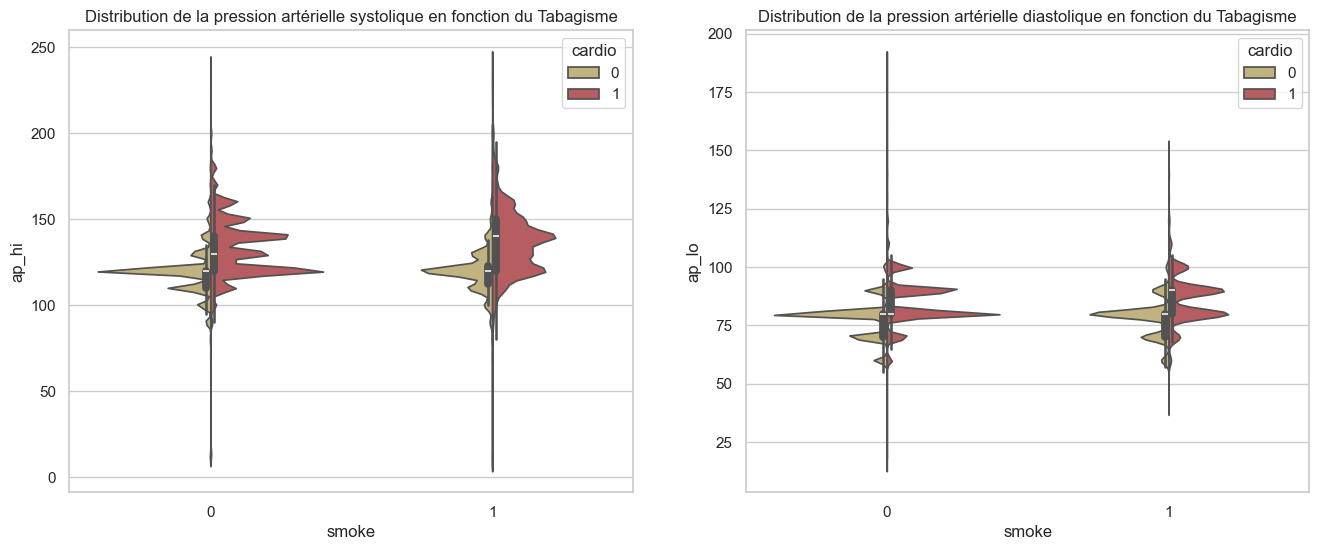

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="smoke", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette=["y", "r"], ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du Tabagisme')

sns.violinplot(x="smoke", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette=["y", "r"], ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du Tabagisme')
plt.show()

## Consommation d'alcool et l'activité physique en fonction de l'Indice de Masse Corporelle (IMC)

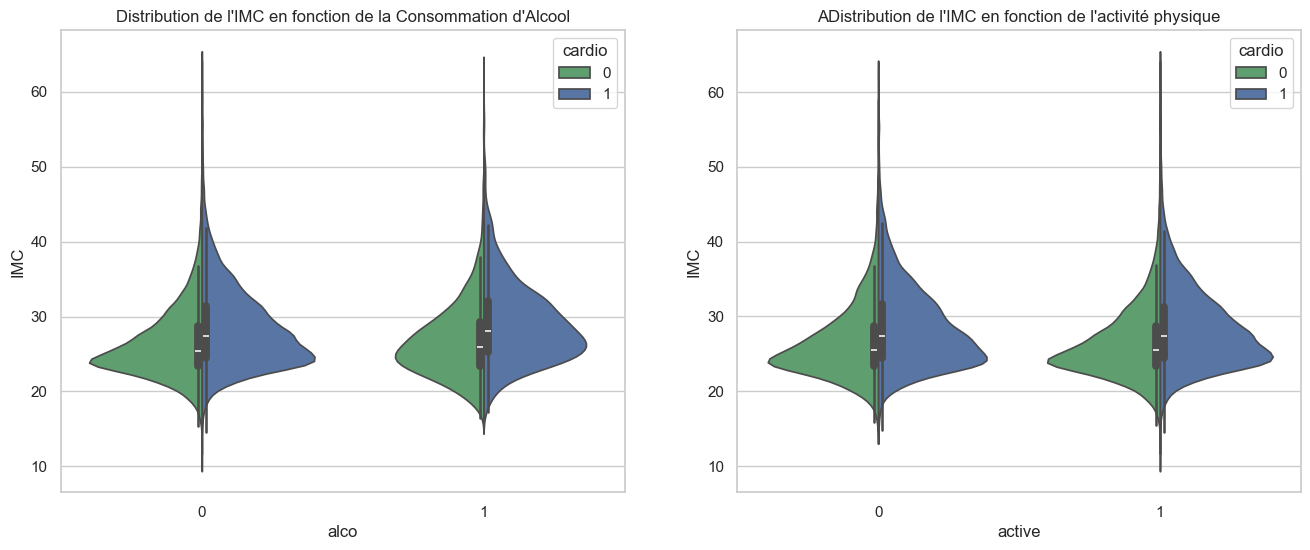

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="alco", y="IMC", hue="cardio", data=cleaned_data, split=True, palette=["g", "b"], ax=axes[0])
axes[0].set_title('Distribution de l\'IMC en fonction de la Consommation d\'Alcool')

sns.violinplot(x="active", y="IMC", hue="cardio", data=cleaned_data, split=True, palette=["g", "b"], ax=axes[1])
axes[1].set_title('ADistribution de l\'IMC en fonction de l\'activité physique')
plt.show()

# Matrice de correlation

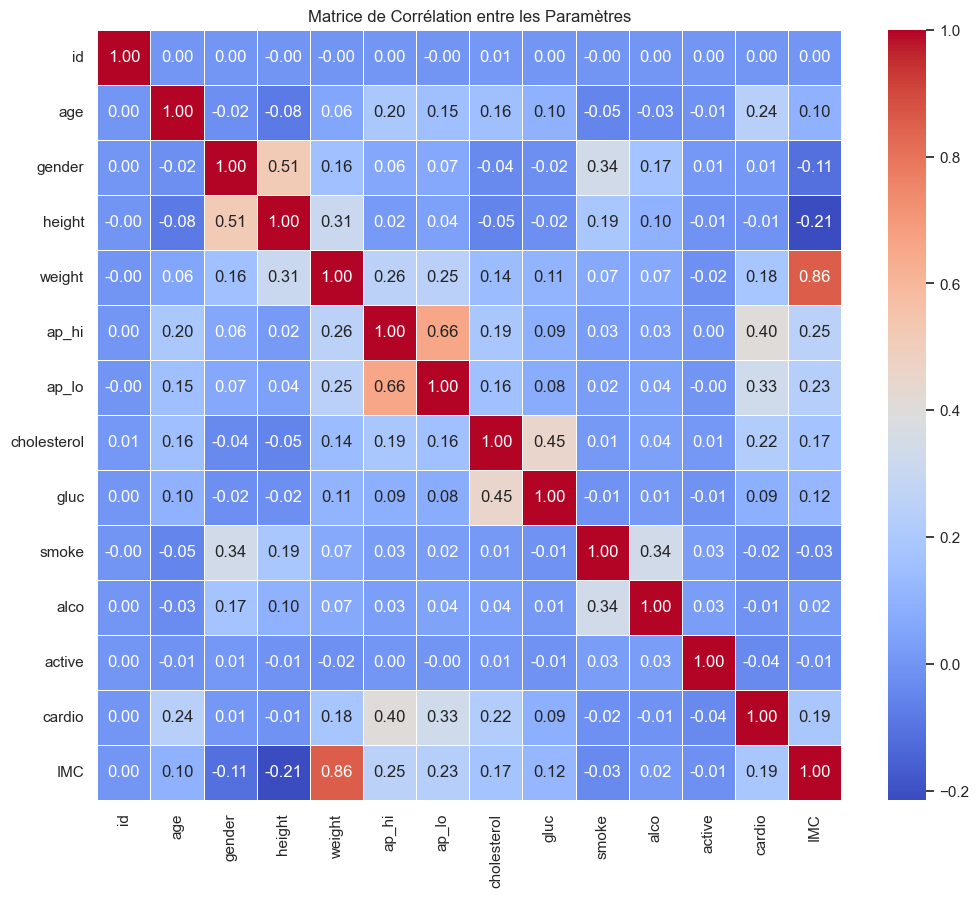

In [83]:
correlation_matrix = cleaned_data.corr()

# Paramètres de style
sns.set_theme(style="white")

# Création de la heatmap (carte thermique) de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation entre les Paramètres')
plt.show()

# data split

In [84]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [85]:
X = cleaned_data.drop(columns=['cardio', 'id'])
y = cleaned_data[['cardio']]

In [86]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble de test en ensembles de test et de validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Affichage des tailles des ensembles
print(f'Taille X_train : {X_train.shape}, Taille y_train : {y_train.shape}')
print(f'Taille X_test : {X_test.shape}, Taille y_test : {y_test.shape}')
print(f'Taille X_val : {X_val.shape}, Taille y_val : {y_val.shape}')

Taille X_train : (55129, 12), Taille y_train : (55129, 1)
Taille X_test : (6891, 12), Taille y_test : (6891, 1)
Taille X_val : (6892, 12), Taille y_val : (6892, 1)


In [87]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [88]:
column_names = ['Name', 'Training_Score', 'Testing_Score', 'precision', 'recall', 'f1', 'accuracy']

score_df = pd.DataFrame(columns=column_names)

def TrainModel(name, model, X_train, y_train, X_test, y_test, X_val, y_val, score_df):

    #pour eviter le werning : "A column-vector y was passed when a 1d array was expected."
    y_train_flatten = y_train["cardio"]

    model.fit(X_train, y_train_flatten)
    training_score = model.score(X_train, y_train_flatten)
    testing_score = model.score(X_test, y_test)

    y_pred = model.predict(X_val)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)


    # Création d'un dictionnaire avec les informations
    result_dict = {'Name': name,
                   'Training_Score': training_score,
                   'Testing_Score': testing_score,
                   'precision' : precision,
                   'recall' : recall,
                   'f1' : f1,
                   'accuracy' : accuracy
                   }

    # Création d'un DataFrame avec une seule ligne
    result_df = pd.DataFrame([result_dict])

    # Ajout du DataFrame à la DataFrame principale
    score_df = pd.concat([score_df, result_df], ignore_index=True)


    return score_df



### Logistic Regression

In [89]:
score_df = TrainModel('LogisticRegression', LogisticRegression(C=0.01, solver='liblinear', max_iter=50000),
                            X_train, y_train, X_test, y_test, X_val, y_val, score_df)

C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_38096\2687084697.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_df = pd.concat([score_df, result_df], ignore_index=True)


### Decision Tree

In [90]:
score_df = TrainModel('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=25, criterion='entropy'),
                            X_train, y_train, X_test, y_test, X_val, y_val, score_df)

### RandomForest

In [91]:
score_df = TrainModel('RandomForestClassifier', RandomForestClassifier(max_features='log2', n_estimators=200),
                            X_train, y_train, X_test, y_test, X_val, y_val, score_df)

### KNN

In [92]:
score_df = TrainModel('KNN', KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform'),
                            X_train, y_train, X_test, y_test, X_val, y_val, score_df)

### XGBoost

In [93]:
score_df = TrainModel('XGBoost', XGBClassifier(n_estimators=200),
                            X_train, y_train, X_test, y_test, X_val, y_val, score_df)

In [94]:
#Voir les resultats d'entrainement
score_df

,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,LogisticRegression,0.726623,0.724133,0.754237,0.671308,0.710361,0.726204
1,DecisionTreeClassifier,0.901903,0.662023,0.681227,0.637946,0.658876,0.669617
2,RandomForestClassifier,0.980246,0.712233,0.711733,0.693357,0.702425,0.706181
3,KNN,0.784161,0.689160,0.699615,0.685814,0.692646,0.695589
4,XGBoost,0.780896,0.722537,0.745938,0.692486,0.718219,0.728236


__________________________________________________________________________

In [95]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


# Construction du modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/25
3446/3446 [==============================] - 9s 2ms/step - loss: 0.5565 - accuracy: 0.7287 - val_loss: 0.5593 - val_accuracy: 0.7237
Epoch 2/25
3446/3446 [==============================] - 7s 2ms/step - loss: 0.5493 - accuracy: 0.7313 - val_loss: 0.5565 - val_accuracy: 0.7276
Epoch 3/25
3446/3446 [==============================] - 7s 2ms/step - loss: 0.5463 - accuracy: 0.7336 - val_loss: 0.5555 - val_accuracy: 0.7238
Epoch 4/25
3446/3446 [==============================] - 7s 2ms/step - loss: 0.5442 - accuracy: 0.7340 - val_loss: 0.5539 - val_accuracy: 0.7298
Epoch 5/25
3446/3446 [==============================] - 8s 2ms/step - loss: 0.5429 - accuracy: 0.7345 - val_loss: 0.5540 - val_accuracy: 0.7288
Epoch 6/25
3446/3446 [==============================] - 8s 2ms/step - loss: 0.5422 - accuracy: 0.7345 - val_loss: 0.5536 - val_accuracy: 0.7289
Epoch 7/25
3446/3446 [==============================] - 8s 2ms/step - loss: 0.5418 - accuracy: 0.7351 - val_loss: 0.5526 - val_accuracy:

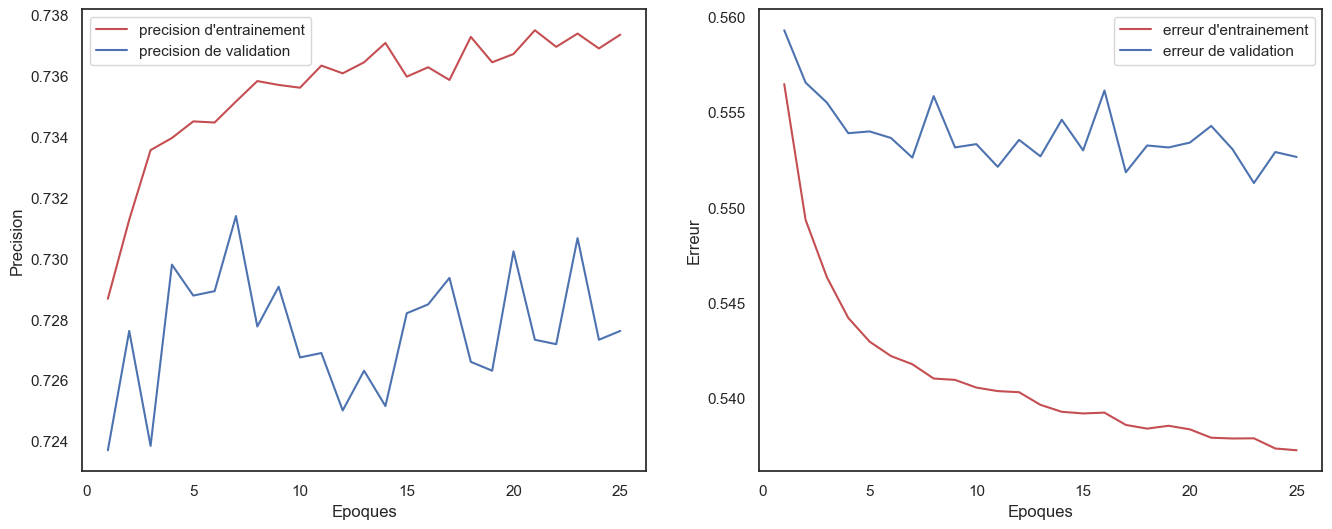

In [96]:
precision = history.history['accuracy']
val_precision = history.history['val_accuracy']
erreur = history.history['loss']
val_erreur = history.history['val_loss']

epoques = range(1, len(precision) + 1)

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.plot(epoques, precision, 'r', label="precision d'entrainement")
plt.plot(epoques, val_precision, 'b', label="precision de validation")
plt.xlabel('Epoques')
plt.ylabel('Precision')
plt.legend()

plt.subplot(122)
plt.plot(epoques, erreur, 'r', label="erreur d'entrainement")
plt.plot(epoques, val_erreur, 'b', label="erreur de validation")
plt.xlabel('Epoques')
plt.ylabel('Erreur')
plt.legend()

plt.show()


In [97]:
y_pred = model.predict(X_val)
y_pred_bin = (y_pred > 0.5).astype('int32')

precision = precision_score(y_val, y_pred_bin)
recall = recall_score(y_val, y_pred_bin)
f1 = f1_score(y_val, y_pred_bin)
accuracy = accuracy_score(y_val, y_pred_bin)

# Création d'un dictionnaire avec les informations
result_dict = {'Name': 'NearalNetwork',
               'Training_Score': precision,
               'Testing_Score': max(val_precision),
               'precision' : precision,
               'recall' : recall,
               'f1' : f1,
               'accuracy' : accuracy
               }

# Création d'un DataFrame avec une seule ligne
result_df = pd.DataFrame([result_dict])

result_df

216/216 [==============================] - 1s 2ms/step


,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,NearalNetwork,0.746397,0.731389,0.746397,0.706121,0.725701,0.733024


In [ ]:
#score_df = score_df.drop(score_df[score_df['Name'] == 'NearalNetwork'].index)

In [98]:
# Ajout du DataFrame à la DataFrame principale
score_df = pd.concat([score_df, result_df], ignore_index=True)
score_df

,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,LogisticRegression,0.726623,0.724133,0.754237,0.671308,0.710361,0.726204
1,DecisionTreeClassifier,0.901903,0.662023,0.681227,0.637946,0.658876,0.669617
2,RandomForestClassifier,0.980246,0.712233,0.711733,0.693357,0.702425,0.706181
3,KNN,0.784161,0.689160,0.699615,0.685814,0.692646,0.695589
4,XGBoost,0.780896,0.722537,0.745938,0.692486,0.718219,0.728236
5,NearalNetwork,0.746397,0.731389,0.746397,0.706121,0.725701,0.733024


In [105]:
score_df['moyenne'] = score_df[['Testing_Score', 'precision', 'recall', 'f1', 'accuracy']].mean(axis=1)
score_df

,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy,moyenne
0,LogisticRegression,0.726623,0.724133,0.754237,0.671308,0.710361,0.726204,0.717249
1,DecisionTreeClassifier,0.901903,0.662023,0.681227,0.637946,0.658876,0.669617,0.661938
2,RandomForestClassifier,0.980246,0.712233,0.711733,0.693357,0.702425,0.706181,0.705186
3,KNN,0.784161,0.689160,0.699615,0.685814,0.692646,0.695589,0.692565
4,XGBoost,0.780896,0.722537,0.745938,0.692486,0.718219,0.728236,0.721483
5,NearalNetwork,0.746397,0.731389,0.746397,0.706121,0.725701,0.733024,0.728526


In [106]:
#score_df.sort_values(by=['Testing_Score', 'precision', 'recall', 'f1', 'accuracy'], ascending=False)
score_df.sort_values(by='moyenne', ascending=False)


,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy,moyenne
5,NearalNetwork,0.746397,0.731389,0.746397,0.706121,0.725701,0.733024,0.728526
4,XGBoost,0.780896,0.722537,0.745938,0.692486,0.718219,0.728236,0.721483
0,LogisticRegression,0.726623,0.724133,0.754237,0.671308,0.710361,0.726204,0.717249
2,RandomForestClassifier,0.980246,0.712233,0.711733,0.693357,0.702425,0.706181,0.705186
3,KNN,0.784161,0.689160,0.699615,0.685814,0.692646,0.695589,0.692565
1,DecisionTreeClassifier,0.901903,0.662023,0.681227,0.637946,0.658876,0.669617,0.661938


## On remarque que le reseau de neurone et XGBoost sont les modèles les plus performants de toutes les modèles testés